<a href="https://colab.research.google.com/github/Kaustubh-20/Regression/blob/main/Insurance_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###IMPORT NECESSARY LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings
# warnings.filterwarnings('ignore')

###LOADING THE DATASET

In [ ]:
data = pd.read_csv('/content/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


###EXPLORATORY DATA ANALYSIS

In [ ]:
data.shape

(1338, 7)

In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
data.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [ ]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
data['sex'] = data['sex'].map({'male':1, 'female': 0})
data['smoker'] = data['smoker'].map({'yes':1, 'no':0})

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(data.region.drop_duplicates())
data.region = le.transform(data.region)

In [ ]:
data.corr()['charges'].sort_values()

,charges
region,-0.006208
sex,0.057292
children,0.067998
bmi,0.198341
age,0.299008
smoker,0.787251
charges,1.000000


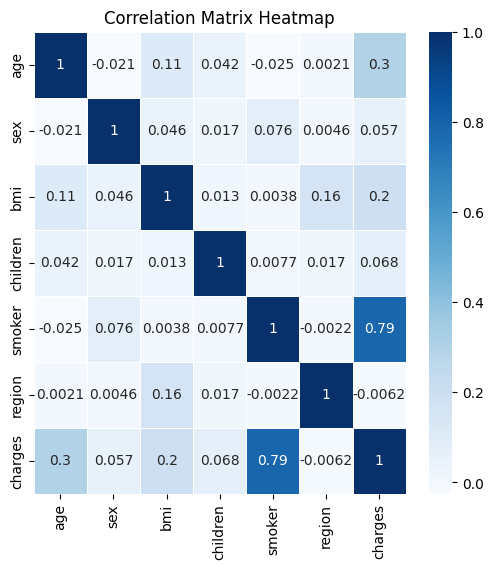

In [ ]:
corr = data.corr()
plt.figure(figsize=(6, 6))
sns.heatmap(corr, annot = True, cmap = 'Blues', linewidths = .5)
plt.title('Correlation Matrix Heatmap')
plt.show()

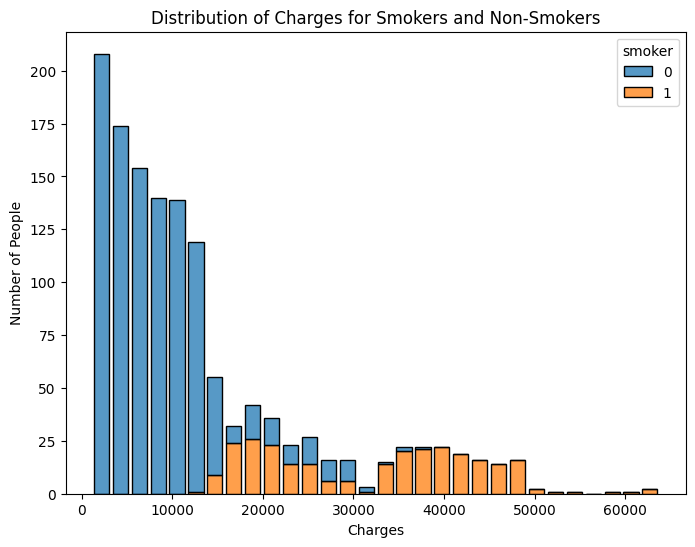

In [ ]:
plt.figure(figsize = (8,6))
sns.histplot(data=data, x='charges', hue = 'smoker', multiple= 'stack', shrink=0.8)
plt.title('Distribution of Charges for Smokers and Non-Smokers')
plt.xlabel('Charges')
plt.ylabel('Number of People')
plt.show()

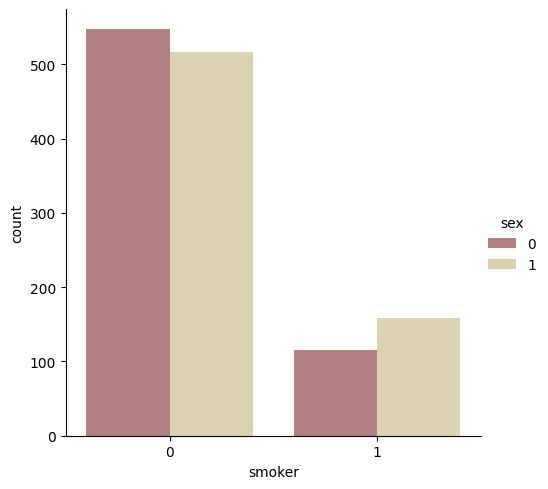

In [ ]:
sns.catplot(x='smoker', kind='count',hue ='sex', palette='pink', data=data)

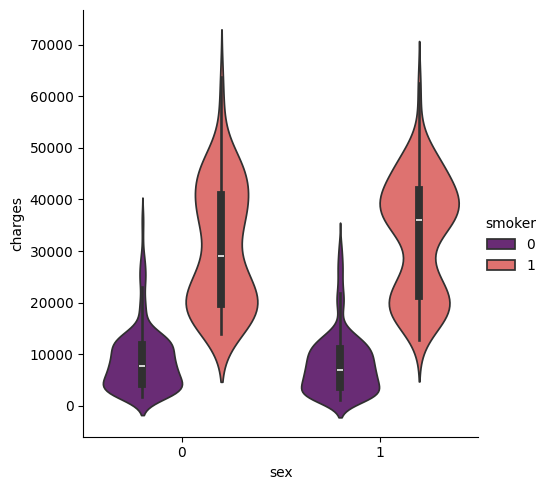

In [ ]:
sns.catplot(x='sex', y='charges', hue = 'smoker', kind = 'violin', data=data, palette = 'magma')

<ipython-input-14-f8175d0559f8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'], color = 'g')


<Axes: title={'center': 'Distribution of age'}, xlabel='age', ylabel='Density'>

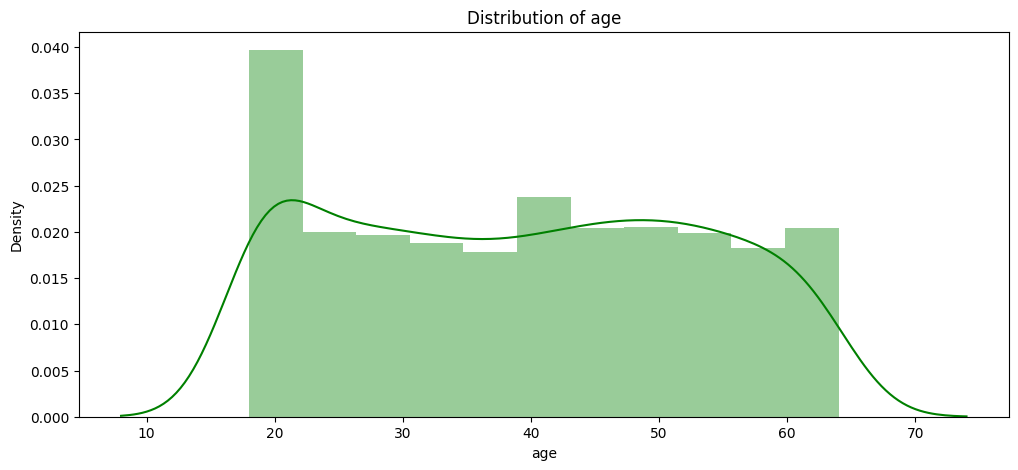

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
sns.distplot(data['age'], color = 'g')

Text(0, 0.5, 'Charges')

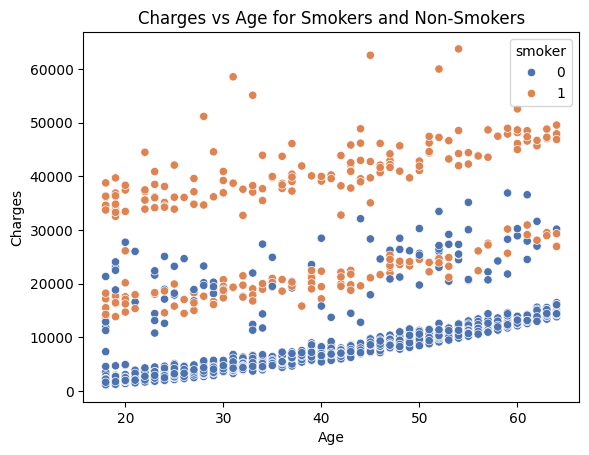

In [ ]:
sns.scatterplot(x='age', y='charges', hue='smoker', palette='deep', data=data)
plt.title('Charges vs Age for Smokers and Non-Smokers')
plt.xlabel('Age')
plt.ylabel('Charges')

<ipython-input-16-3032f4a63af7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bmi'], color = 'm')


<Axes: title={'center': 'Distribution of BMI'}, xlabel='bmi', ylabel='Density'>

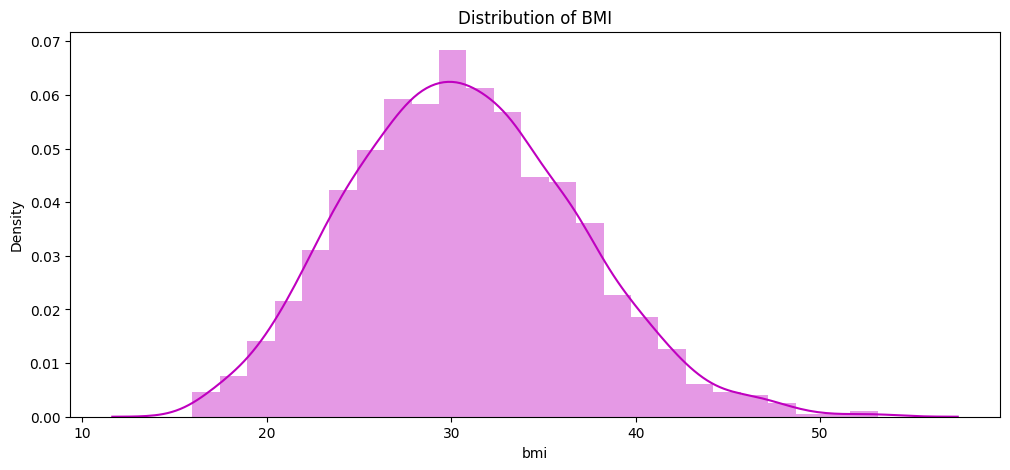

In [ ]:
plt.figure(figsize = (12,5))
plt.title('Distribution of BMI')
sns.distplot(data['bmi'], color = 'm')

<ipython-input-17-527b78fcc5f7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[(data.bmi >= 30)]['charges'], color='r')


<Axes: title={'center': 'Distribution of charges for patients with BMI greater than 30'}, xlabel='charges', ylabel='Density'>

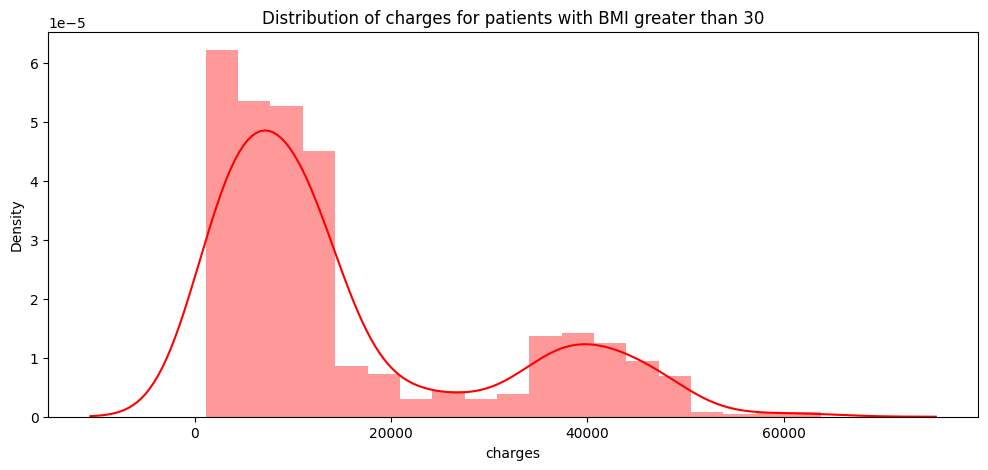

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
sns.distplot(data[(data.bmi >= 30)]['charges'], color='r')

<ipython-input-18-aea962e1dfac>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[(data.bmi < 30)]['charges'], color='b')


<Axes: title={'center': 'Distribution of charges for patients with BMI greater than 30'}, xlabel='charges', ylabel='Density'>

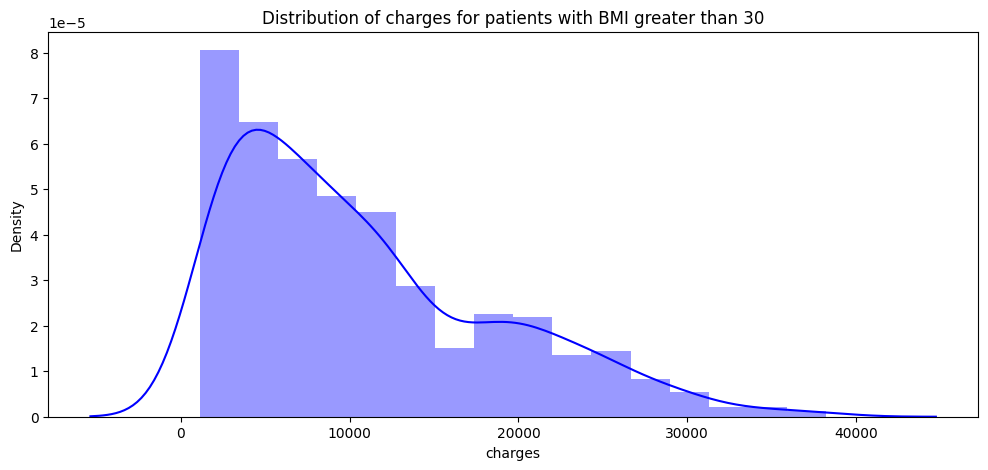

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
sns.distplot(data[(data.bmi < 30)]['charges'], color='b')

Text(0, 0.5, 'Charges')

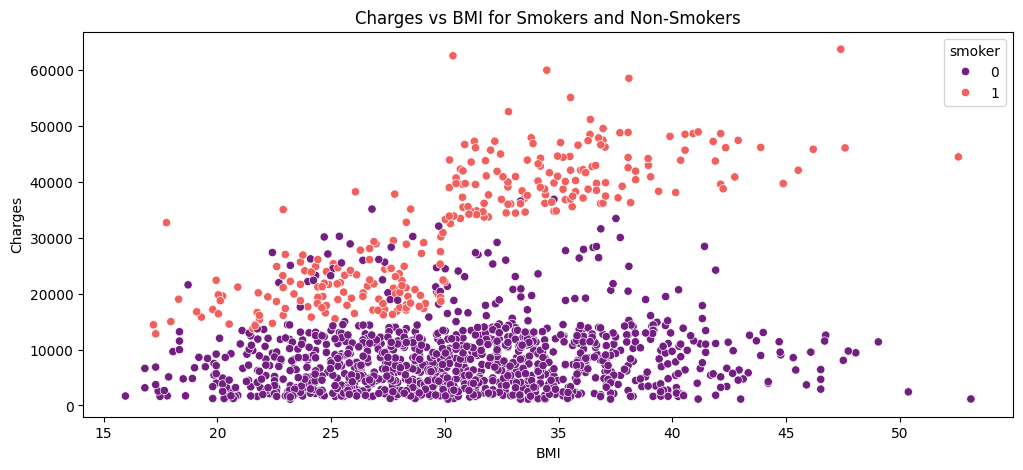

In [ ]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='bmi', y = 'charges', hue = 'smoker', palette = 'magma', data=data)
plt.title('Charges vs BMI for Smokers and Non-Smokers')
plt.xlabel('BMI')
plt.ylabel('Charges')

<ipython-input-20-f1a59488c1ab>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='children', kind='count', palette='pink', data=data)


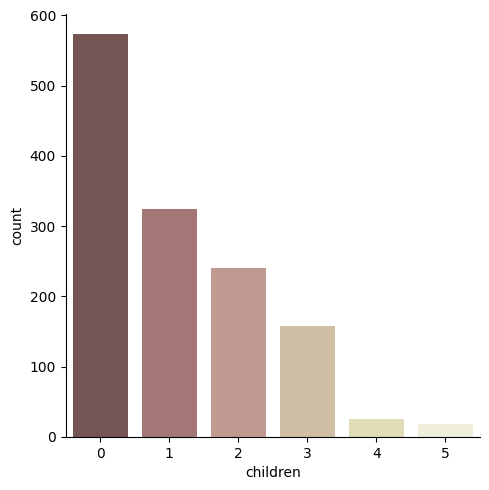

In [ ]:
sns.catplot(x='children', kind='count', palette='pink', data=data)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
x = data.drop(['charges', 'region'], axis = 1)
y = data.charges

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state =0)
lr = LinearRegression().fit(x_train, y_train)

y_pred = lr.predict(x_test)

print(lr.intercept_)
print(lr.coef_)

-11569.635215817916
[2.51765762e+02 1.18219052e+01 3.14055462e+02 4.38766233e+02
 2.36244139e+04]


In [ ]:
print("R2 score: ", r2_score(y_test, y_pred))
print("MSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score:  0.7952171980481992
MSE:  5678.017317091146


In [ ]:
poly = PolynomialFeatures(degree=2)

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

plr = LinearRegression()
plr.fit(x_train_poly, y_train)

y_train_pred = plr.predict(x_train_poly)
y_test_pred = plr.predict(x_test_poly)

print(plr.intercept_)
print(plr.coef_)

-5958.890870034307
[ 0.00000000e+00 -2.66774390e+01 -3.42040990e+02  5.63684841e+02
  8.36533884e+02 -9.50481435e+03  2.93261150e+00  1.17246417e+01
  1.51477453e+00  5.33909240e+00  7.39562034e+00 -3.42040990e+02
  9.16159893e+00 -2.83372404e+02 -6.29847064e+02 -9.93534183e+00
  8.44191099e+00  1.41549385e+03 -1.30171297e+02 -4.48324744e+02
 -9.50481435e+03]


In [ ]:
print("R2 score: ", r2_score(y_test, y_test_pred))
print("MSE: ", np.sqrt(mean_squared_error(y_test,y_test_pred)))

R2 score:  0.8849197344147233
MSE:  4256.478068102457


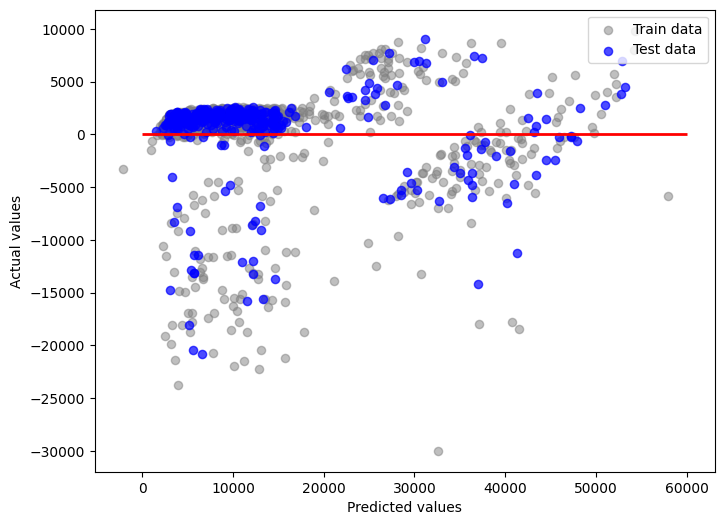

In [ ]:
plt.figure(figsize=(8,6))

plt.scatter(y_train_pred, y_train_pred - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_test_pred, y_test_pred - y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')